Este cuaderno contiene la descomposición estacional de la demanda energética de Colombia en el periodo enero 2021 - diciembre 2022, y se incluye el análisis de correlación entre meses de este periodo para la serie original, tendencia (trend), estacional (seasonal)y residuo (residual).

# Librerias/Paquetes

In [ ]:
# Importación de bibliotecas básicas

# Importar la biblioteca pandas para la manipulación de datos
import pandas as pd

# Importar la biblioteca matplotlib para la visualización de datos
import matplotlib.pyplot as plt

# Importar la biblioteca numpy para operaciones numéricas
import numpy as np

# Importar la función 'array' de la biblioteca numpy
from numpy import array

# Importar la biblioteca seaborn para la visualización de datos
import seaborn as sns

# Importar la función 'scatter_matrix' de la biblioteca pandas.plotting
from pandas.plotting import scatter_matrix

# Importar la función 'tabulate' de la biblioteca tabulate
from tabulate import tabulate

# Importar la biblioteca datetime para manipulación de fechas y tiempos
import datetime as dt

# Importación de paquetes de aprendizaje automático

# Importar funciones específicas de la biblioteca scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Importar la clase 'KernelRidge' de la subbiblioteca 'kernel_ridge' de scikit-learn
from sklearn.kernel_ridge import KernelRidge

# Importar la clase 'KNeighborsRegressor' de la subbiblioteca 'neighbors' de scikit-learn
from sklearn.neighbors import KNeighborsRegressor

# Importar clases de modelos de regresión lineal y otros algoritmos
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Importar métricas de rendimiento de scikit-learn
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

# Importación de paquetes de TensorFlow y Keras

# Importar la biblioteca TensorFlow y verificar la versión
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Importar clases y funciones específicas de Keras para modelos de red neuronal
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, BatchNormalization, ReLU
from keras import Model

# Importar la función 'pprint' de la biblioteca pprint
from pprint import pprint

# Importar clases y funciones relacionadas con el análisis de series de tiempo

# Importar la función 'seasonal_decompose' de la subbiblioteca 'tsa.seasonal' de statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Importar la clase 'SARIMAX' de la subbiblioteca 'tsa.statespace.sarimax' de statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Importar la función 'tabulate' de la biblioteca tabulate
from tabulate import tabulate

# Configuración de advertencias y mensajes

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )

# Mostrar advertencia personalizada
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

# Importación y administración de archivos en Colab

# Importar la función 'files' de la biblioteca google.colab
from google.colab import files

In [ ]:
def Part_meses(S):
    """
    Realiza la partición de los datos en variables mensuales.

    Args:
        S (pd.DataFrame): DataFrame que contiene los datos a particionar.

    Returns:
        pd.DataFrame: DataFrame con las variables mensuales.
    """
    # Crear un DataFrame vacío para almacenar las variables mensuales
    d = pd.DataFrame()

    # Separar los datos en variables mensuales y agregarlas al DataFrame 'd'
    d['Enero_2021'] = pd.DataFrame(S[0:720].values)
    d['Febrero_2021'] = pd.DataFrame(S[720:1440].values)
    d['Marzo_2021'] = pd.DataFrame(S[1440:2160].values)
    d['Abril_2021'] = pd.DataFrame(S[2160:2880].values)
    d['Mayo_2021'] = pd.DataFrame(S[2880:3600].values)
    d['Junio_2021'] = pd.DataFrame(S[3600:4320].values)
    d['Julio_2021'] = pd.DataFrame(S[4320:5040].values)
    d['Agosto_2021'] = pd.DataFrame(S[5040:5760].values)
    d['Septiembre_2021'] = pd.DataFrame(S[5760:6480].values)
    d['Octubre_2021'] = pd.DataFrame(S[6480:7200].values)
    d['Noviembre_2021'] = pd.DataFrame(S[7200:7920].values)
    d['Diciembre_2021'] = pd.DataFrame(S[7920:8640].values)
    d['Enero_2022'] = pd.DataFrame(S[8760:9480].values)
    d['Febrero_2022'] = pd.DataFrame(S[9480:10200].values)
    d['Marzo_2022'] = pd.DataFrame(S[10200:10920].values)
    d['Abril_2022'] = pd.DataFrame(S[10920:11640].values)
    d['Mayo_2022'] = pd.DataFrame(S[11640:12360].values)
    d['Junio_2022'] = pd.DataFrame(S[12360:13080].values)
    d['Julio_2022'] = pd.DataFrame(S[13080:13800].values)
    d['Agosto_2022'] = pd.DataFrame(S[13800:14520].values)
    d['Septiembre_2022'] = pd.DataFrame(S[14520:15240].values)
    d['Octubre_2022'] = pd.DataFrame(S[15240:15960].values)
    d['Noviembre_2022'] = pd.DataFrame(S[15960:16680].values)
    d['Diciembre_2022'] = pd.DataFrame(S[16680:17400].values)

    return d

# Carga Base de Datos

In [ ]:
# Cargar datos de demanda energética comercial en Colombia desde Google Drive (acceso libre)

# Código de identificación del archivo en Google Drive
FILEID = "1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_"  # Copiar el código desde el enlace generado en Google Drive

# Descargar el archivo utilizando wget y gestionar las cookies temporales
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt

# Descomprimir el archivo descargado en el directorio principal de Colab
!unzip Departamentos.zip

# Mostrar el contenido del directorio actual
!dir

--2023-05-31 22:58:30--  https://docs.google.com/uc?export=download&confirm=&id=1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.102, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k4mcjd12f6vdufja1vv6qb704g4bh17e/1685573850000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=7fce8369-85ac-4137-a7af-34452d35cc1b [following]
--2023-05-31 22:58:38--  https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k4mcjd12f6vdufja1vv6qb704g4bh17e/1685573850000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=7fce8369-85ac-4137-a7af-34452d35cc1b
Resolving doc-0c-6k-docs.googleusercontent.com (doc-0c-6k-docs.googleusercontent.com)... 74.125.137.132, 2607:

In [ ]:
# Asignación de la base de datos descargada a la variable df (DataFrame)
# Se lee el archivo Excel y se almacena en el DataFrame 'df'
df = pd.read_excel('/content/Demanda_Arreglo_Mean.xlsx')

# Rellenar los valores faltantes en el DataFrame con el valor promedio
# Los valores faltantes se reemplazan con el valor medio de la columna correspondiente
df.fillna(df.mean(), inplace=True)

In [ ]:
# Eliminación de la columna 'Date' del DataFrame
# Se descarta la columna 'Date' del DataFrame 'df'
df = df.drop('Date', axis=1)

# Establecimiento del índice temporal y frecuencia horaria
# Se genera un rango de fechas con frecuencia horaria desde '2020-10-01' hasta '2023-01-01'
date_rng = pd.date_range(start='2020-10-01', end='2023-01-01', freq='H')

# Establecimiento del índice del DataFrame utilizando las fechas generadas
# El índice del DataFrame 'df' se establece como las fechas generadas, excepto el último valor
df.set_index(date_rng[0:-1], inplace=True)

In [ ]:
# Visualización de los primeros elementos de la base de datos
# Se muestran las primeras filas del DataFrame 'df' para inspeccionar los datos
df.head()

,Colombia,Bogota,Caribe Mar,Antioquia,Caribe Sol,Cali,Santander,Boyaca,Valle del Cauca,Meta,...,Cauca,Nariño,Pereira,Casanare,Quindio,Choco,Tulua,Cartago,Costa Caribe,Valle del Sibundoy
2020-10-01 00:00:00,7140559.26,1320792.69,1224290.37,899450.34,1090389.39,414176.69,350902.86,278981.87,264640.87,157696.69,...,98578.43,63232.62,56584.97,54231.09,42546.54,24259.00,22226.42,18485.01,4134.73,956.50
2020-10-01 01:00:00,6889229.54,1265863.83,1188898.49,852134.53,1053745.78,397509.19,338021.81,291912.15,258723.10,154469.65,...,95748.21,58963.14,53894.29,52937.00,39641.78,21787.79,21468.45,17933.59,4100.38,887.62
2020-10-01 02:00:00,6768128.26,1242928.76,1164769.75,843323.57,1022801.61,386700.22,333269.26,304934.61,250411.11,152529.17,...,93315.29,57276.91,52370.15,50573.76,38634.57,23169.62,20459.32,17417.63,4069.11,853.63
2020-10-01 03:00:00,6701299.05,1260574.75,1132657.87,848113.38,992043.52,380463.87,324627.44,309025.29,248248.85,153509.13,...,94824.47,57305.74,52095.61,49493.68,38229.84,21423.47,20267.58,17464.35,4065.57,839.21
2020-10-01 04:00:00,6806767.20,1325971.00,1120738.54,888338.01,975121.31,384215.95,321360.54,317756.70,252769.41,154665.14,...,99061.18,60415.12,53296.95,49035.41,39145.05,21137.06,19941.27,17853.03,4051.39,885.95


In [ ]:
# Visualización de información general de la base de datos
# Se muestra información resumida sobre el DataFrame 'df', incluyendo tipos de datos y recuento de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19728 entries, 2020-10-01 00:00:00 to 2022-12-31 23:00:00
Freq: H
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Colombia             19728 non-null  float64
 1   Bogota               19728 non-null  float64
 2   Caribe Mar           19728 non-null  float64
 3   Antioquia            19728 non-null  float64
 4   Caribe Sol           19728 non-null  float64
 5   Cali                 19728 non-null  float64
 6   Santander            19728 non-null  float64
 7   Boyaca               19728 non-null  float64
 8   Valle del Cauca      19728 non-null  float64
 9   Meta                 19728 non-null  float64
 10  Norte de Sanatender  19728 non-null  float64
 11  Caldas               19728 non-null  float64
 12  Tolima               19728 non-null  float64
 13  Huila                19728 non-null  float64
 14  Cauca                19728 non-null  float6

In [ ]:
# Descripción estadística básica
# Se muestra un resumen estadístico de las principales estadísticas descriptivas del DataFrame 'df'
df.describe()

,Colombia,Bogota,Caribe Mar,Antioquia,Caribe Sol,Cali,Santander,Boyaca,Valle del Cauca,Meta,...,Cauca,Nariño,Pereira,Casanare,Quindio,Choco,Tulua,Cartago,Costa Caribe,Valle del Sibundoy
count,1.972800e+04,1.972800e+04,1.972800e+04,1.972800e+04,1.972800e+04,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,...,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000,19728.000000
mean,8.520192e+06,1.807964e+06,1.219146e+06,1.185503e+06,1.084959e+06,466686.253226,404478.881664,382545.774393,297607.805125,241126.564176,...,118725.156032,98013.693317,78301.319537,65949.009244,59679.457872,29574.782567,27083.359705,22926.530593,18478.418195,1476.075680
std,1.093714e+06,3.357052e+05,1.207211e+05,2.103032e+05,1.050221e+05,90049.921783,58095.453927,43134.607242,42890.528684,42931.755896,...,20203.255991,23092.035719,16647.526556,10140.697160,13221.226402,5514.486243,5147.476119,4598.685197,4637.772815,424.663737
min,5.389560e+06,9.323532e+05,8.200898e+05,6.655529e+05,7.435277e+05,230292.470000,273547.250000,250470.700000,150879.650000,69241.370000,...,57368.720000,22987.180000,41426.100000,19236.070000,34369.780000,721.380000,10975.770000,5820.730000,334.010000,1.340000
25%,7.544031e+06,1.496971e+06,1.133439e+06,9.890094e+05,1.006931e+06,387911.067500,349145.052500,352816.957500,263498.635000,211564.645000,...,102148.172500,76115.875000,62028.442500,58117.160000,45813.272500,25074.640000,22345.570000,18802.190000,16128.320000,1094.820000
50%,8.592540e+06,1.851653e+06,1.217416e+06,1.199002e+06,1.088679e+06,460237.160000,407030.285000,381836.640000,297215.985000,234802.960000,...,120914.495000,105358.605000,78915.250000,65902.820000,62314.215000,30362.460000,27073.905000,22927.440000,18674.260000,1522.900000
75%,9.507811e+06,2.125857e+06,1.305449e+06,1.382209e+06,1.161113e+06,548786.922500,457124.092500,411522.805000,333971.752500,264663.655000,...,132537.840000,113206.272500,94126.175000,73933.610000,71361.767500,33448.482500,31595.925000,27203.895000,21526.457500,1698.575000
max,1.078689e+07,2.357194e+06,1.601461e+06,1.564164e+06,1.383224e+06,674006.860000,527920.810000,518485.300000,405763.410000,415640.860000,...,189113.070000,461849.760000,108883.020000,94536.780000,84428.180000,154800.600000,39683.090000,32790.120000,31110.880000,2741.200000


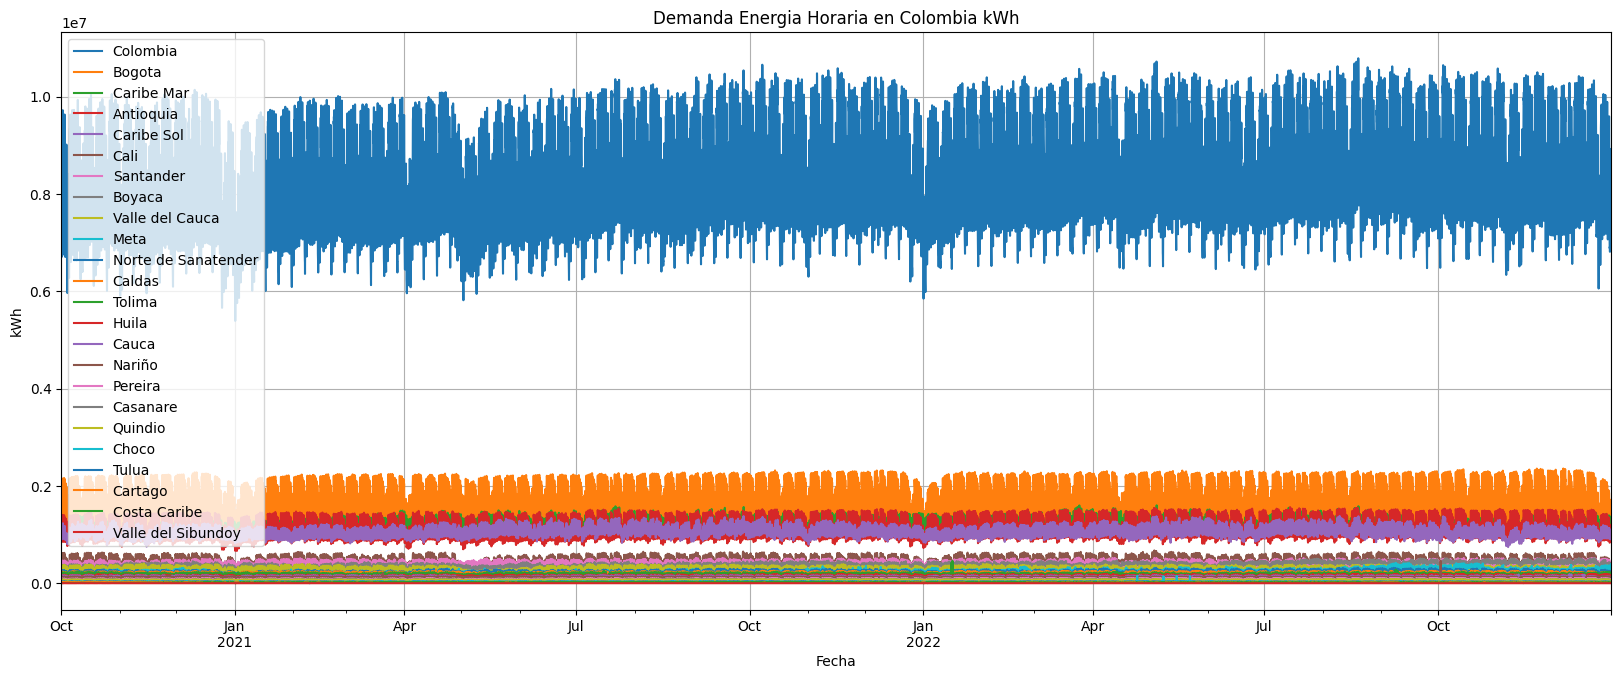

In [ ]:
# Gráfica general de la base de datos de demanda energética
# Se genera un gráfico de línea que muestra la demanda energética horaria en Colombia en kWh
# Se ajusta el tamaño de la figura y se agrega título y etiquetas de ejes
df.plot(kind='line', figsize=(20, 7.5), title='Demanda Energía Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha')

# Guardar la gráfica como archivo de imagen
# Se guarda la gráfica generada en formato PNG con el nombre "Cap3_Deman_T.png"
plt.savefig("Cap3_Deman_T.png", format="png")

# Opción adicional para guardar en formato EPS (descomentar la línea correspondiente si es necesario)
# plt.savefig("Cap3_Deman_T.eps", format="eps")

In [ ]:
# Descarga automática del archivo creado
# Se descarga automáticamente el archivo de imagen "Cap3_Deman_T.png" generado previamente
files.download("/content/Cap3_Deman_T.png")

# Opción adicional para descargar en formato EPS (descomentar la línea correspondiente si es necesario)
# files.download("/content/Cap3_Deman_T.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

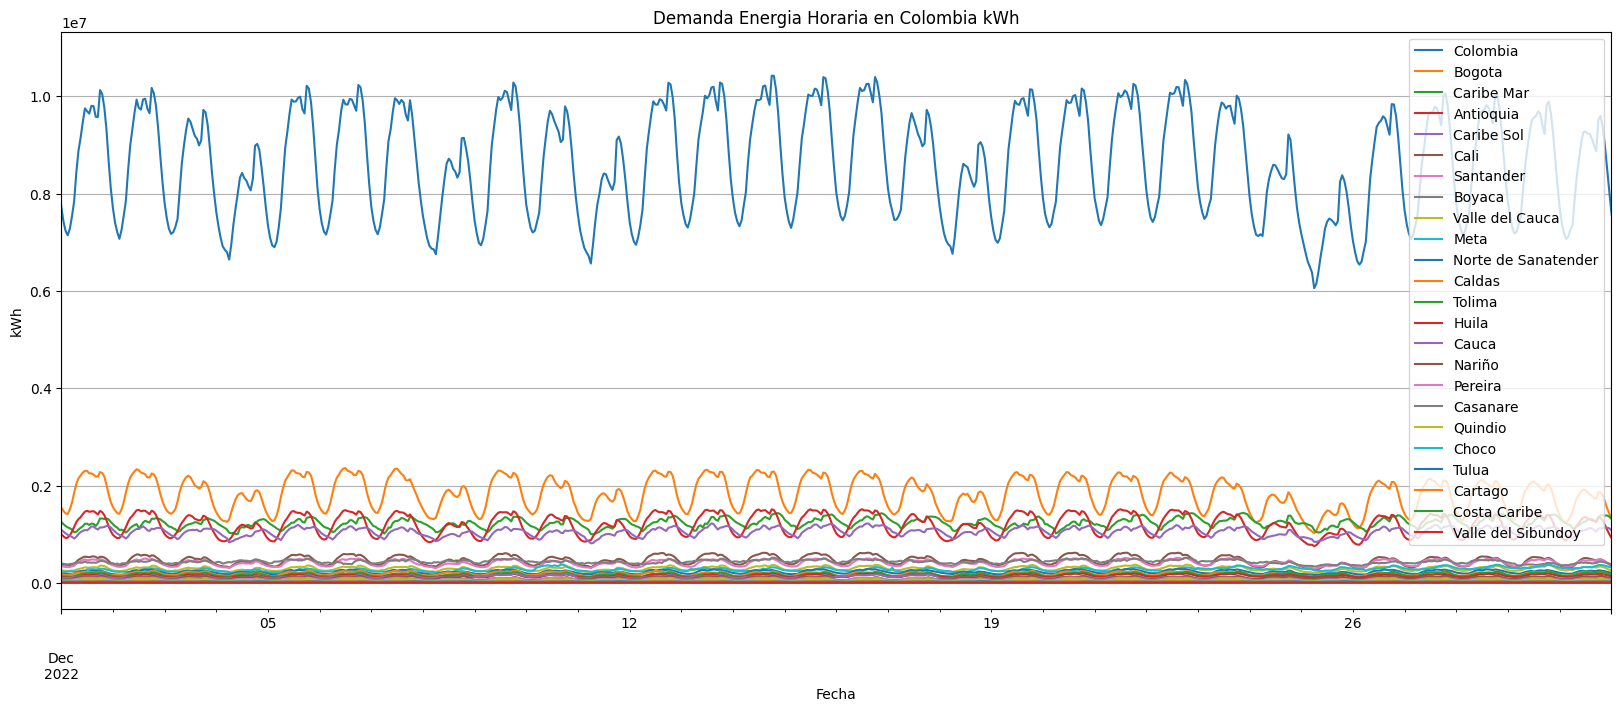

In [ ]:
# Gráfica detallada de la base de datos de demanda energética
# Se genera un gráfico de línea que muestra la demanda energética horaria en Colombia en kWh
# Se ajusta el tamaño de la figura, se agrega título y etiquetas de ejes, y se limita el rango de fechas
df.plot(kind='line', figsize=(20, 7.5), title='Demanda Energía Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha', xlim=('2022-12-01', '2022-12-31'))

# Descomposicion Estacional

In [ ]:
# Creación de una nueva variable 'a' para análisis
# Se guarda en la variable 'a' los datos de la columna 'Colombia' del DataFrame 'df' para su posterior análisis
a = pd.DataFrame(df['Colombia'])

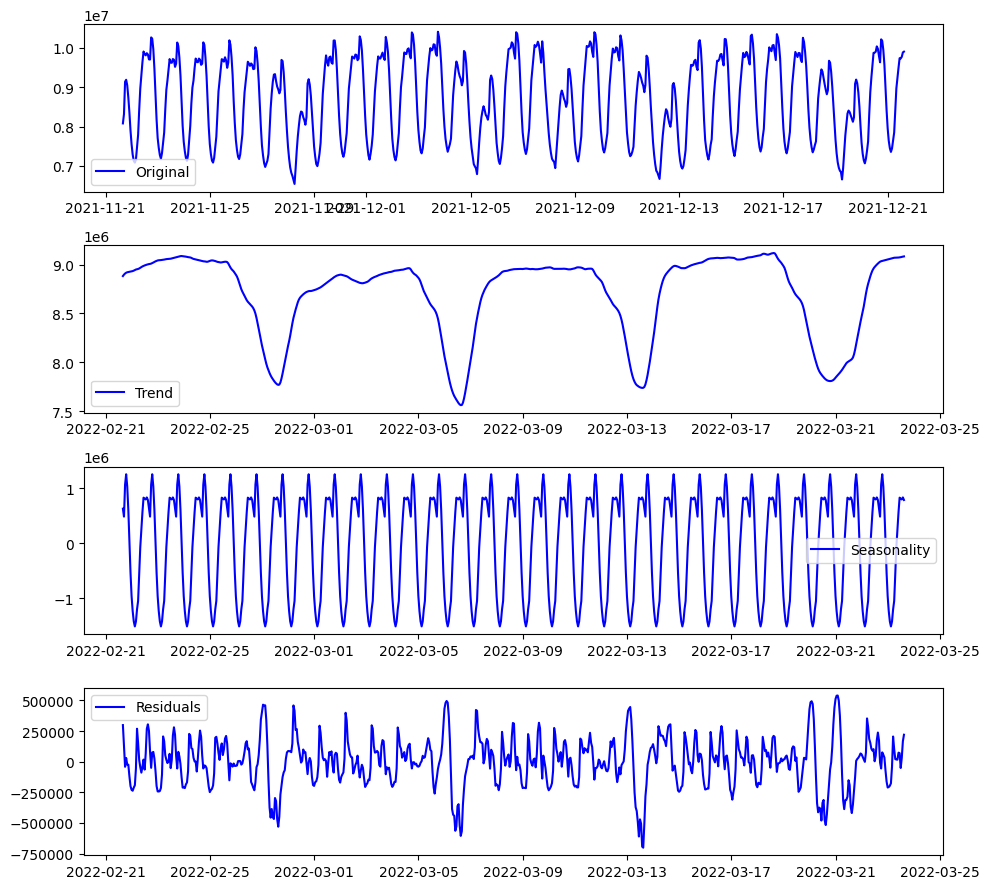

In [ ]:
# Descomposición estacional de la serie de tiempo 'a'
# Se aplica la descomposición estacional en modo aditivo a los datos de la columna 'Colombia' del DataFrame 'a'
decomposition_add = seasonal_decompose(a['2021-01-01':], model='additive', extrapolate_trend='freq')

# Separación de componentes
# Se extraen las componentes: tendencia (trend), estacionalidad (seasonal) y residuo (residual)
trend = decomposition_add.trend
seasonal = decomposition_add.seasonal
residual = decomposition_add.resid

# Definición de límites para visualización
inic = 10000  # Índice inicial de datos para la visualización
fn = 10720    # Índice final de datos para la visualización

# Gráficas de las componentes
plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.plot(a[inic:fn], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend[inic:fn], label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal[inic:fn], label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual[inic:fn], label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# Partición mensual de la descomposición estacional
# Se utiliza la función 'Part_meses' para realizar la partición de las componentes
# de la descomposición estacional por meses, desde enero de 2021 hasta finales de diciembre de 2022

# Partición de la serie de tiempo original
S_Org_Mons = Part_meses(pd.DataFrame(a['2021-01-01':].values))

# Partición de la componente de tendencia
S_trend_Mons = Part_meses(pd.DataFrame(trend.values))

# Partición de la componente estacional
S_seasonal_Mons = Part_meses(pd.DataFrame(seasonal.values))

# Partición de la componente residual
S_residual_Mons = Part_meses(pd.DataFrame(residual.values))

In [ ]:
# Partición mensual de la descomposición estacional
# Se utiliza la función 'Part_meses' para realizar la partición de las componentes
# de la descomposición estacional por meses, desde enero de 2021 hasta finales de diciembre de 2022

# Partición de la serie de tiempo original
S_Org_Mons = Part_meses(pd.DataFrame(a['2021-01-01':].values))

# Partición de la componente de tendencia
S_trend_Mons = Part_meses(pd.DataFrame(trend.values))

# Partición de la componente estacional
S_seasonal_Mons = Part_meses(pd.DataFrame(seasonal.values))

# Partición de la componente residual
S_residual_Mons = Part_meses(pd.DataFrame(residual.values))

# Visualizacion de las series organizadas por meses
S_Org_Mons.head(-1)

,Enero_2021,Febrero_2021,Marzo_2021,Abril_2021,Mayo_2021,Junio_2021,Julio_2021,Agosto_2021,Septiembre_2021,Octubre_2021,...,Marzo_2022,Abril_2022,Mayo_2022,Junio_2022,Julio_2022,Agosto_2022,Septiembre_2022,Octubre_2022,Noviembre_2022,Diciembre_2022
0,6621102.82,7053277.47,7290479.78,7412970.82,6931615.52,7006182.62,7749087.94,7699856.00,7624329.07,8035515.06,...,7761146.83,7858382.57,7607261.24,7540957.83,7839436.48,8098739.06,7346660.82,7855585.99,7838265.74,7565782.30
1,6424331.96,6735398.20,7032356.83,7074041.14,6649199.79,6807170.63,7454327.27,7405900.59,7310313.14,7768838.30,...,7536383.74,7607017.26,7313890.70,7274554.43,7536894.45,7786650.60,7126920.56,7572434.59,7518223.99,7271330.12
2,6191155.68,6529786.45,6859279.12,6888653.72,6468982.35,6641904.84,7241117.72,7224401.68,7110963.03,7588571.38,...,7366524.63,7439830.34,7050836.91,7099102.99,7359191.51,7537201.17,6955497.56,7307846.19,7356090.27,7036915.84
3,6004458.65,6401999.92,6796509.85,6766689.66,6370943.77,6584669.55,7121334.90,7132054.11,6971548.09,7450140.00,...,7288461.21,7360755.68,6912400.96,7064978.83,7270447.46,7459510.15,6907206.98,7234008.41,7330013.36,6883504.29
4,5888433.33,6330043.98,6913947.93,6694164.89,6365800.19,6691855.82,7168926.50,7224105.39,6920195.45,7548158.41,...,7487893.68,7564116.02,6788529.60,7274683.45,7403384.33,7541914.74,7140950.12,7465078.64,7509959.73,6821883.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,8881526.98,9425655.82,9371281.45,8851350.91,8235109.51,9716163.74,9802759.69,9598239.75,10496960.69,10282474.26,...,10112521.35,9576242.45,9181169.75,9794018.75,10080127.49,8916834.86,10339389.39,10417021.69,9918042.69,9836111.14
715,9256699.82,9657143.85,9621436.81,9092709.69,8645902.38,10146936.34,10099343.61,9824615.41,10537812.50,10203649.63,...,10253879.66,9727962.25,9547186.08,10140015.20,10466126.06,9287598.25,10429678.66,10363390.85,9808496.21,9830867.96
716,9030692.99,9386853.19,9412688.93,8888256.73,8549340.20,9910153.71,9885516.49,9563573.60,10286427.88,9968956.83,...,10021970.05,9487574.41,9352772.45,9952590.95,10229915.57,9176885.57,10178732.51,10054126.02,9504266.81,9598488.59
717,8549112.33,8994428.75,9068936.07,8506809.95,8268462.01,9471056.73,9420692.11,9112022.32,9832373.80,9509494.58,...,9572017.31,9057937.16,8953623.18,9547006.68,9783346.37,8791454.04,9740681.46,9558243.30,9059237.33,9165169.47


# Correlacion Señal Original

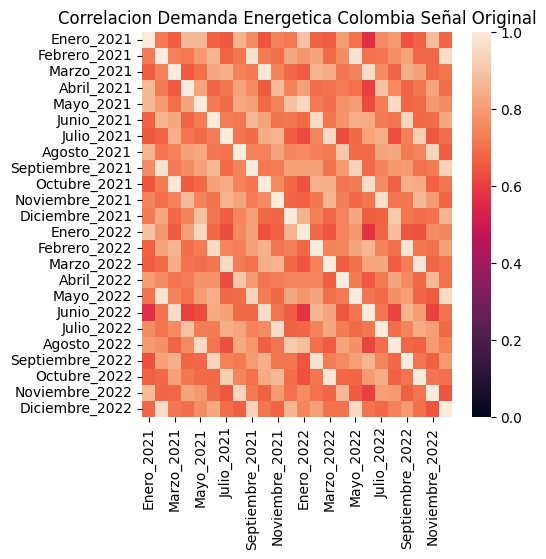

In [ ]:
# Visualización de la correlación mediante mapas de calor
# Se crea un mapa de calor para mostrar la correlación entre los meses de la serie de tiempo original

# Se define el tamaño de la figura del mapa de calor
plt.figure(figsize=(5, 5))

# Se calcula la matriz de correlación entre los meses de la serie de tiempo original
b = S_Org_Mons.corr()

# Se crea el mapa de calor con la matriz de correlación
sns.heatmap(b, vmin=0)

# Se establece el título del mapa de calor
plt.title("Correlación Demanda Energética Colombia Señal Original")

# Se muestra el mapa de calor
plt.show()

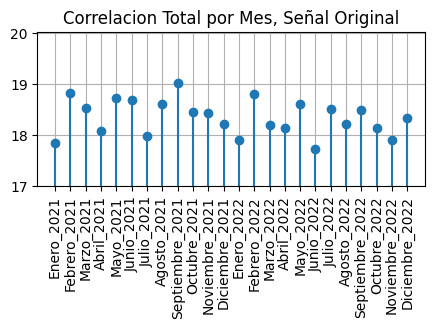

In [ ]:
# Visualización de la correlación total de cada uno de los meses en formato stem
# Se crea una visualización en formato de tallos (stem) para mostrar la correlación total de cada mes en la serie de tiempo original

# Crear un DataFrame vacío para almacenar la correlación total de cada mes
c = pd.DataFrame()

# Calcular la suma de correlaciones de cada mes y almacenarla en el DataFrame
c['CR_Total'] = b.sum(axis=1)

# Crear la figura y los ejes para el gráfico de tallos
fig, ax = plt.subplots(figsize=(5, 2))

# Dibujar el gráfico de tallos
ax.stem(c.index, c['CR_Total'])

# Configurar los ejes
ax.set_ylim(17, c['CR_Total'].max() + 1)  # Ajustar los límites del eje y
ax.set_xticklabels(c.index, rotation=90)  # Etiquetas en el eje x con rotación
ax.set_title('Correlación Total por Mes, Señal Original')  # Título del gráfico
ax.grid(True)  # Agregar la grilla

# Mostrar el gráfico de tallos
plt.show()

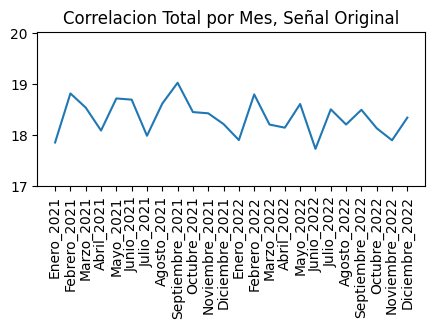

In [ ]:
# Visualización de la correlación total de cada uno de los meses en formato de gráfico de líneas

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(5, 2))

# Dibujar el gráfico de líneas
ax.plot(c.index, c['CR_Total'])

# Configurar los ejes
ax.set_ylim(17, c['CR_Total'].max() + 1)  # Ajustar los límites del eje y
ax.set_xticklabels(c.index, rotation=90)  # Etiquetas en el eje x con rotación
ax.set_title('Correlación Total por Mes, Señal Original')  # Título del gráfico

# Mostrar el gráfico de líneas
plt.show()

# Correlacion Trent

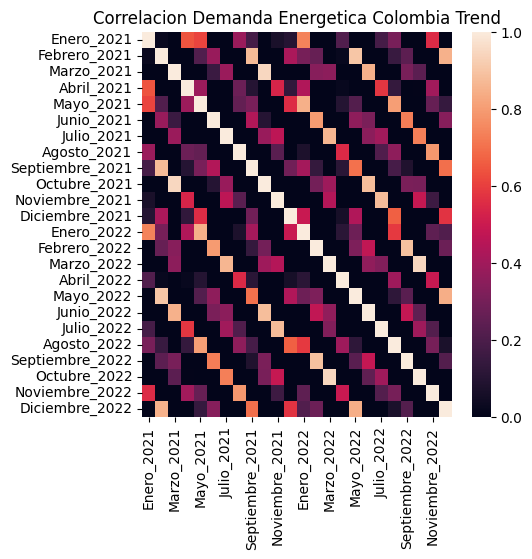

In [ ]:
# Visualización de la correlación mediante mapas de calor para la tendencia de la demanda energética en Colombia

# Crear una figura con un tamaño de 5x5 pulgadas
plt.figure(figsize=(5, 5))

# Calcular la matriz de correlación entre los meses para la tendencia
b = S_trend_Mons.corr()

# Crear un mapa de calor usando la matriz de correlación
sns.heatmap(b, vmin=0)  # vmin se establece en 0 para asegurar que los valores de correlación sean no negativos

# Agregar título al gráfico
plt.title("Correlación de la Tendencia de la Demanda Energética en Colombia")

# Mostrar el mapa de calor
plt.show()

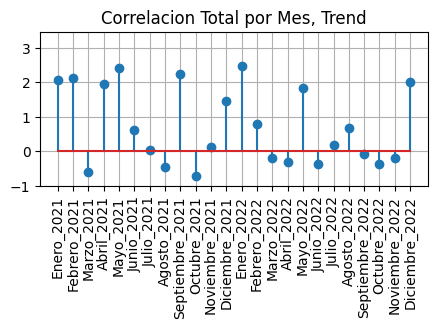

In [ ]:
# Visualización de la correlación total de cada uno de los meses en formato stem para la tendencia de la demanda energética en Colombia

# Crear un DataFrame vacío para almacenar la correlación total de cada mes
c = pd.DataFrame()
c['CR_Total'] = b.sum(axis=1)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(5, 2))

# Dibujar el gráfico stem utilizando los índices de los meses como coordenadas x y los valores de correlación como coordenadas y
ax.stem(c.index, c['CR_Total'])

# Configurar los ejes
ax.set_ylim(-1, c['CR_Total'].max() + 1)  # Ajustar los límites del eje y
ax.set_xticklabels(c.index, rotation=90)  # Etiquetas de los meses en el eje x rotadas 90 grados
ax.set_title('Correlación Total por Mes, Tendencia')
ax.grid(True)  # Agregar la grilla

# Mostrar el gráfico
plt.show()

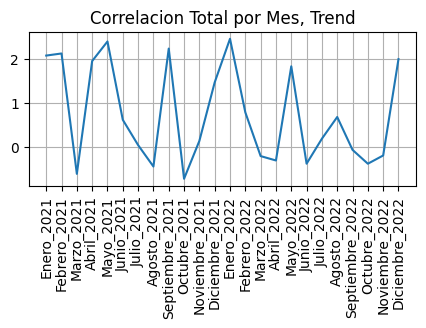

In [ ]:
# Visualización de la correlación total de cada uno de los meses en formato de línea para la tendencia de la demanda energética en Colombia

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(5, 2))

# Dibujar el gráfico de línea utilizando los índices de los meses como coordenadas x y los valores de correlación como coordenadas y
ax.plot(c.index, c['CR_Total'])

# Configurar los ejes
ax.set_xticklabels(c.index, rotation=90)  # Etiquetas de los meses en el eje x rotadas 90 grados
ax.set_title('Correlación Total por Mes, Tendencia')
ax.grid(True)  # Agregar la grilla

# Mostrar el gráfico
plt.show()

# Correlacion Seasonal

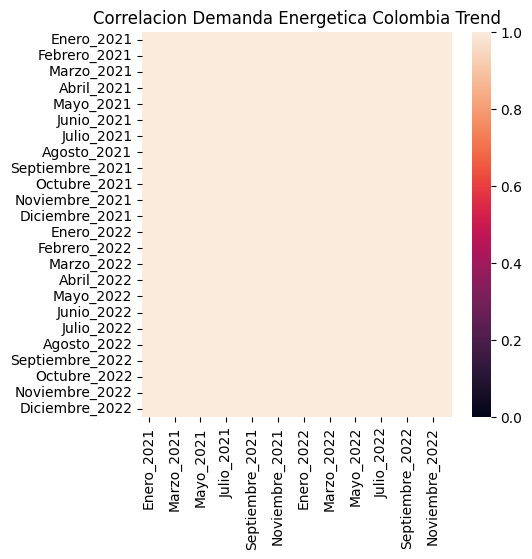

In [ ]:
# Visualización de la correlación entre los componentes estacionales de la demanda energética en Colombia mediante mapas de calor

# Crear una figura con un tamaño específico para la visualización
plt.figure(figsize=(5, 5))

# Calcular la matriz de correlación entre los componentes estacionales de la demanda
b = S_seasonal_Mons.corr()

# Crear un mapa de calor para visualizar la matriz de correlación, con valores mínimos establecidos en 0
sns.heatmap(b, vmin=0)

# Agregar título al mapa de calor
plt.title("Correlación de la Demanda Energética en Colombia (Componente Estacional)")

# Mostrar la visualización
plt.show()

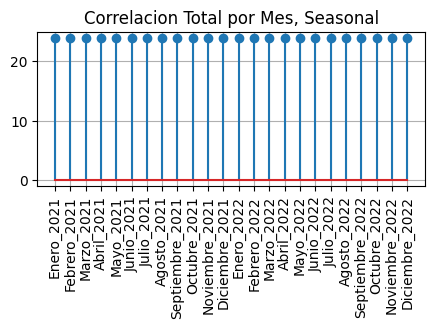

In [ ]:
# Visualización de la correlación total de cada uno de los meses del componente estacional, en formato de stem plot

# Crear un DataFrame vacío para almacenar la correlación total de cada mes
c = pd.DataFrame()
c['CR_Total'] = b.sum(axis=1)

# Crear una figura y ejes para la visualización, con tamaño específico
fig, ax = plt.subplots(figsize=(5, 2))

# Dibujar un gráfico de stem (línea con marcadores) para representar la correlación total por mes
ax.stem(c.index, c['CR_Total'])

# Configurar los ejes
# Ajustar los límites del eje x
ax.set_ylim(-1, c['CR_Total'].max() + 1)  # Ajustar los límites del eje y
ax.set_xticklabels(c.index, rotation=90)  # Etiquetas de fechas en el eje x
ax.set_title('Correlación Total por Mes, Componente Estacional')  # Título del gráfico

# Agregar una grilla
ax.grid(True)

# Mostrar el gráfico
plt.show()

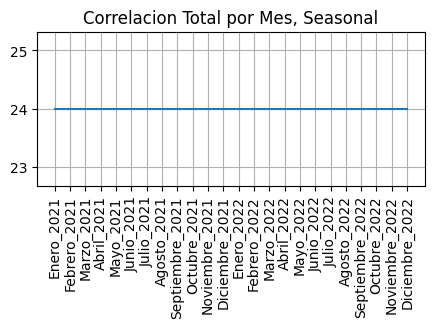

In [ ]:
# Visualización de la correlación total de cada uno de los meses del componente estacional, en formato de plot

# Crear una figura y ejes para la visualización, con tamaño específico
fig, ax = plt.subplots(figsize=(5, 2))

# Dibujar un gráfico de línea para representar la correlación total por mes
ax.plot(c.index, c['CR_Total'])

# Configurar los ejes
ax.set_xticklabels(c.index, rotation=90)  # Etiquetas de fechas en el eje x
ax.set_title('Correlación Total por Mes, Componente Estacional')  # Título del gráfico

# Agregar una grilla
ax.grid(True)

# Mostrar el gráfico
plt.show()

# Correlacion Residual

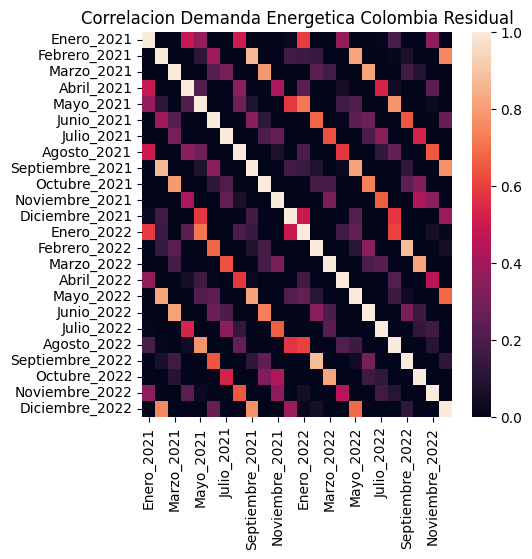

In [ ]:
# Visualización de la correlación por medio de mapas de calor en el componente residual

# Crear una figura de tamaño específico
plt.figure(figsize=(5, 5))

# Calcular la matriz de correlación para el componente residual
b = S_residual_Mons.corr()

# Crear un mapa de calor usando seaborn para visualizar la matriz de correlación
sns.heatmap(b, vmin=0)

# Establecer el título del mapa de calor
plt.title("Correlación Demanda Energética Colombia, Componente Residual")

# Mostrar el gráfico
plt.show()

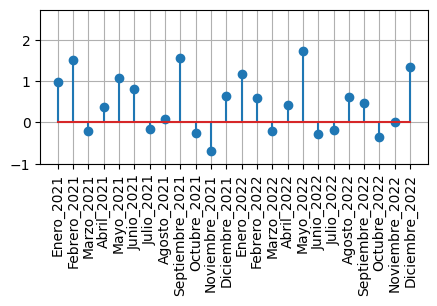

In [ ]:
# Visualización de la correlación total de cada uno de los meses en formato de stem plot

# Crear un DataFrame para almacenar la suma de las correlaciones por mes
c = pd.DataFrame()
c['CR_Total'] = b.sum(axis=1)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(5, 2))

# Dibujar el stem plot
ax.stem(c.index, c['CR_Total'])

# Configurar los ejes
# Ajustar los límites del eje y
ax.set_ylim(-1, c['CR_Total'].max()+1)
# Ajustar las etiquetas del eje x para que estén legibles
ax.set_xticklabels(c.index, rotation=90)

# Agregar la grilla
ax.grid(True)

# Mostrar el gráfico
plt.show()

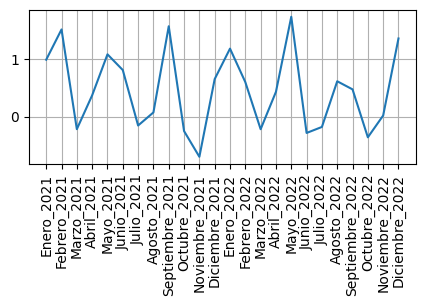

In [ ]:
# Visualización de la correlación total de cada uno de los meses en formato de plot

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(5, 2))

# Dibujar el plot
ax.plot(c.index, c['CR_Total'])

# Configurar los ejes
# Ajustar las etiquetas del eje x para que estén legibles
ax.set_xticklabels(c.index, rotation=90)

# Agregar la grilla
ax.grid(True)

# Mostrar el gráfico
plt.show()